In [68]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import sys
sys.path.append(r'C:\Users\yuhan\nanospheres\src')
from utils import load_timestreams, get_psd

In [27]:
from cycler import cycler
default_cycler = cycler(color=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004'])

params = {'figure.figsize': (7, 3),
          'axes.prop_cycle': default_cycler,
          'axes.titlesize': 14,
          'legend.fontsize': 12,
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12}
plt.rcParams.update(params)

#### Noise from detector and the picoscope

In [32]:
detector_dark = r"D:\others\20240614_detector_dark_noise_200mVrange_laseroff\20240614_detector_dark_noise_200mVrange_1.mat"
detector_laseron = r"D:\others\20240614_detector_noise_nosphere_accoupled\20240614_detector_dark_noise_2.mat"
pickup = r"D:\others\20240618_picoscope_pickup_noise\20240618_picoscope_pickup_noise_02.mat"
pickup_openbnc = r"D:\others\20240618_picoscope_pickup_openbnc\20240618_picoscope_pickup_openbnc_03.mat"

dt0, tt0, nn0 = load_timestreams(detector_dark)
dt1, tt1, nn1 = load_timestreams(detector_laseron)
dt2, tt2, nn2 = load_timestreams(pickup)
dt3, tt3, nn3 = load_timestreams(pickup_openbnc)

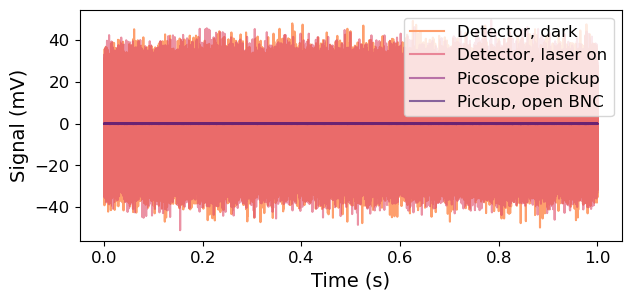

In [33]:
plt.plot(tt0[tt0<1], nn0[0][tt0<1]*1000, label='Detector, dark')
plt.plot(tt1[tt1<1], nn1[0][tt1<1]*1000, label='Detector, laser on', alpha=0.6)
plt.plot(tt2, nn2[0]*1000, label='Picoscope pickup', alpha=0.6)
plt.plot(tt3, nn3[0]*1000, label='Pickup, open BNC', alpha=0.6)

plt.xlabel('Time (s)')
plt.ylabel('Signal (mV)')
plt.legend(loc='upper right')

#### Measured sphere signal at $5.4 \times 10^{-8}$ mbar

In [83]:
data_dir = r"D:\calibration"
prefix = r'20240617_noefield_5_4e-8mbar'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

# Join 10 seconds of data together
dt = 0
zz_list = []
for f in file_list:
    dtt, tt, zz = load_timestreams(sphere_data)
    zz_list.append(zz[0])
    dt = dtt
zz_timestream = np.concatenate(zz_list)

In [84]:
ff0, pp0 = get_psd(dt0, None, nn0[0])
ff1, pp1 = get_psd(dt1, None, nn1[0])
ff2, pp2 = get_psd(dt2, None, nn2[0])
ff3, pp3 = get_psd(dt3, None, nn3[0])

ff, pp = get_psd(dtt, None, zz_timestream)

In [85]:
adc_err = 400e-3/(2**12)
adc_pp = adc_err**2 / 1e6  # Assume 1 MHz bandwidth and white

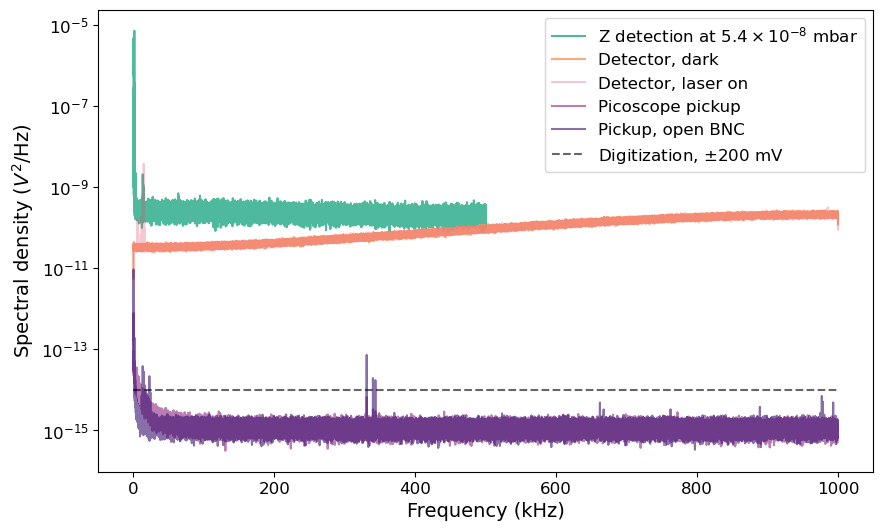

In [87]:
plt.figure(figsize=(10, 6))

plt.plot(ff/1000, pp, label=r'Z detection at $5.4 \times 10^{-8}$ mbar', color='#22a884', alpha=0.8)
plt.plot(ff0/1000, pp0, label='Detector, dark', alpha=0.9)
plt.plot(ff1/1000, pp1, label='Detector, laser on', alpha=0.3)
plt.plot(ff2/1000, pp2, label='Picoscope pickup', alpha=0.6)
plt.plot(ff3/1000, pp3, label='Pickup, open BNC', alpha=0.6)
plt.plot(np.arange(1000), np.full(1000, adc_pp), '--', label=r'Digitization, $\pm 200$ mV', alpha=0.6)

plt.xlabel('Frequency (kHz)')
plt.ylabel('Spectral density ($V^2$/Hz)')
plt.yscale('log')
plt.legend(loc='upper right')